In [1]:
import cv2 as cv  # to import our own images
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf  # in order to build the neural network to get the data and test it

2024-06-23 11:28:32.818320: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-23 11:28:32.821967: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-23 11:28:32.867402: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 11:28:33.788347: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [46]:
# Load the MNIST dataset: data set with all handwritten digits
mnist = tf.keras.datasets.mnist

# Split the data 10%-20% for testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (scale pixel values to range [0, 1])
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [47]:
# Define the model
model = tf.keras.models.Sequential()

# Input Layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Dense Layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
# Output Layer
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

# Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
# Train the model
model.fit(x_train, y_train, epochs=3)  # epochs: how many time is the model going to see the data again (repeat the process)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')

# Save the model with the .keras extension
model.save("digits.keras")

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8627 - loss: 0.4762
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9646 - loss: 0.1144
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9777 - loss: 0.0729
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.9686 - loss: 0.1059
Accuracy: 0.972000002861023
Loss: 0.09533052891492844


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The result is probably 1


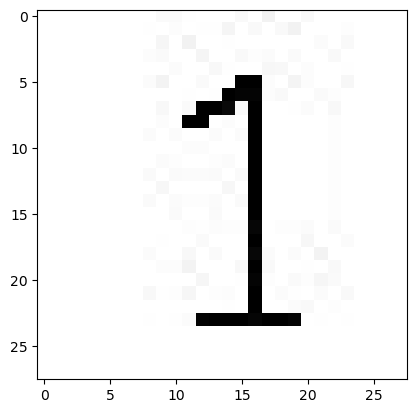

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The result is probably 2


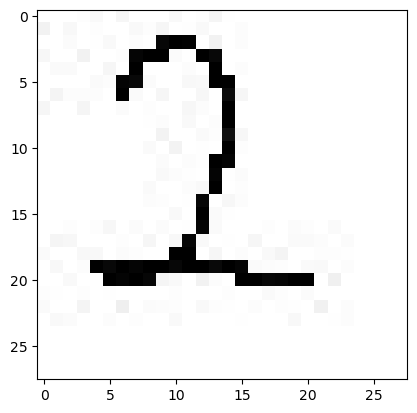

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
The result is probably 3


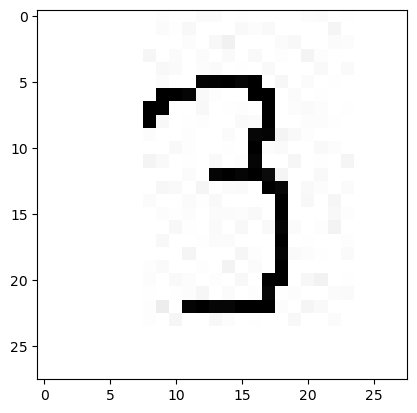

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The result is probably 1


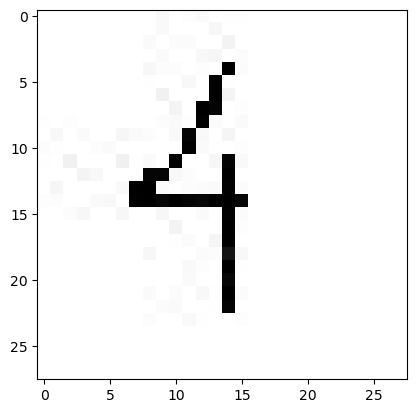

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The result is probably 9


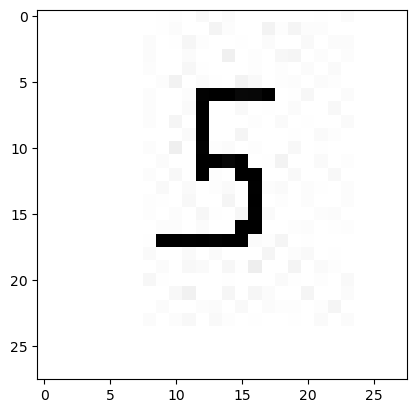

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
The result is probably 6


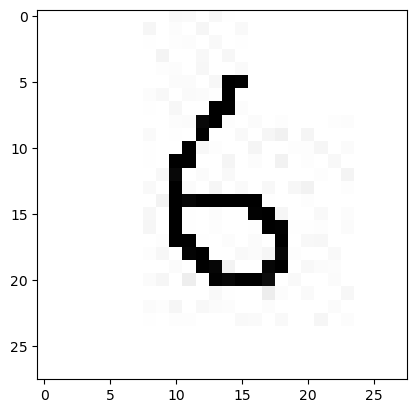

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
The result is probably 7


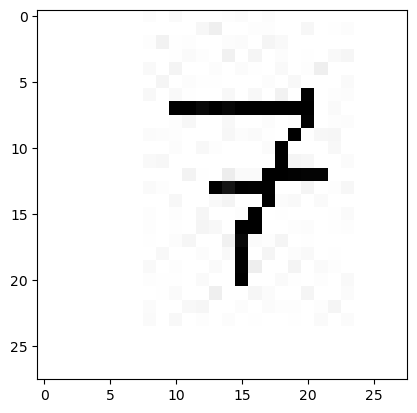

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The result is probably 3


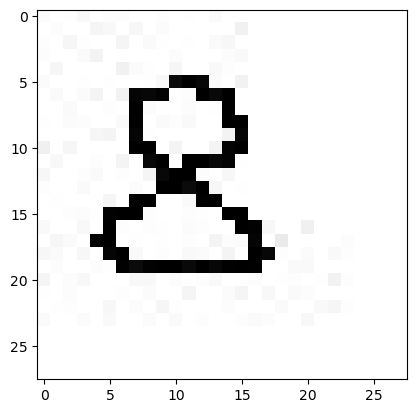

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
The result is probably 1


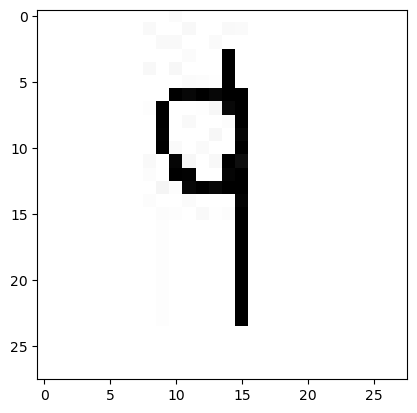

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The result is probably 8


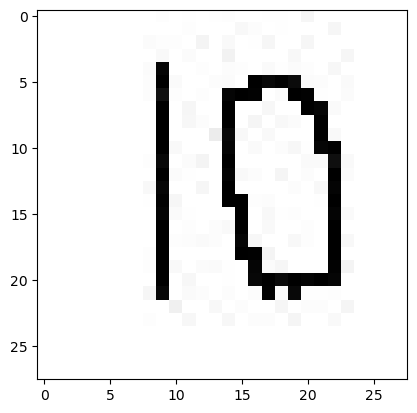

In [48]:
# Open the Images
for i in range(1, 11):
    img = cv.imread(f"numbers/{i}.jpg")[:, :, 0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"The result is probably {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()